# NBA Playoff Prediction - Model Comparison

This notebook compares the best models from three prediction approaches:
1. **Logistic Regression** - Classical linear classifier with regularization
2. **K-Nearest Neighbors (KNN)** - Non-parametric distance-based classifier
3. **Neural Network** - Deep learning classifier with multiple architectures

We compare their performance across five key metrics on the test set.


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c']

## Section 1: Load Best Models from Each Approach

In [ ]:
y_test = np.load('data/processed/y_test.npy').flatten()
X_test_scaled = np.load('data/processed/X_test_scaled.npy')
X_test_poly2 = np.load('data/processed/X_test_poly2.npy')
X_test_poly3 = np.load('data/processed/X_test_poly3.npy')
X_test_pca = np.load('data/processed/X_test_pca.npy')

print("Test data loaded:")
print(f"  y_test shape: {y_test.shape}")
print(f"  X_test_scaled shape: {X_test_scaled.shape}")
print(f"  X_test_poly2 shape: {X_test_poly2.shape}")
print(f"  X_test_poly3 shape: {X_test_poly3.shape}")
print(f"  X_test_pca shape: {X_test_pca.shape}")

Test data loaded:
  y_test shape: (120,)
  X_test_scaled shape: (120, 27)
  X_test_poly2 shape: (120, 405)
  X_test_poly3 shape: (120, 4059)
  X_test_pca shape: (120, 13)


In [ ]:
lr_results = pd.read_csv('results/logistic_regression/model_results.csv')
lr_best = lr_results.sort_values('test_auc', ascending=False).iloc[0]

print("=" * 80)
print("LOGISTIC REGRESSION - Best Model")
print("=" * 80)
print(f"Feature Transformation: {lr_best['version_desc']}")
print(f"Lambda (Regularization): {lr_best['lambda']}")
print(f"Test Accuracy: {lr_best['test_acc']:.4f}")
print(f"Test Precision: {lr_best['test_precision']:.4f}")
print(f"Test Recall: {lr_best['test_recall']:.4f}")
print(f"Test F1 Score: {lr_best['test_f1']:.4f}")
print(f"Test AUC: {lr_best['test_auc']:.4f}")

knn_results = pd.read_csv('results/knn/model_results.csv')
knn_best = knn_results.sort_values('test_auc', ascending=False).iloc[0]

print("\n" + "=" * 80)
print("K-NEAREST NEIGHBORS - Best Model")
print("=" * 80)
print(f"Feature Transformation: {knn_best['version_desc']}")
print(f"K: {int(knn_best['k'])}, Metric: {knn_best['metric']}, Weights: {knn_best['weights']}")
print(f"Test Accuracy: {knn_best['test_acc']:.4f}")
print(f"Test Precision: {knn_best['test_precision']:.4f}")
print(f"Test Recall: {knn_best['test_recall']:.4f}")
print(f"Test F1 Score: {knn_best['test_f1']:.4f}")
print(f"Test AUC: {knn_best['test_auc']:.4f}")

nn_results = pd.read_csv('results/neural_network/model_results.csv')
nn_best = nn_results.sort_values('test_auc', ascending=False).iloc[0]

print("\n" + "=" * 80)
print("NEURAL NETWORK - Best Model")
print("=" * 80)
print(f"Feature Transformation: {nn_best['version_desc']}")
print(f"Architecture: {nn_best['architecture']}, Regularization: {nn_best['regularization']}")
print(f"Test Accuracy: {nn_best['test_acc']:.4f}")
print(f"Test Precision: {nn_best['test_f1']:.4f}")
print(f"Test Recall: {nn_best['test_recall']:.4f}")
print(f"Test F1 Score: {nn_best['test_f1']:.4f}")
print(f"Test AUC: {nn_best['test_auc']:.4f}")

LOGISTIC REGRESSION - Best Model
Feature Transformation: Baseline (untransformed)
Lambda (Regularization): 0.01
Test Accuracy: 0.8917
Test Precision: 0.8493
Test Recall: 0.9688
Test F1 Score: 0.9051
Test AUC: 0.9754

K-NEAREST NEIGHBORS - Best Model
Feature Transformation: Polynomial degree 3
K: 21, Metric: manhattan, Weights: distance
Test Accuracy: 0.8167
Test Precision: 0.7500
Test Recall: 0.9844
Test F1 Score: 0.8514
Test AUC: 0.9660

NEURAL NETWORK - Best Model
Feature Transformation: Baseline (untransformed)
Architecture: 2-Layer, Regularization: L2-0.01
Test Accuracy: 0.8833
Test Precision: 0.9000
Test Recall: 0.9844
Test F1 Score: 0.9000
Test AUC: 0.9819


## Section 2: Evaluate Models on Test Set

In [ ]:
comparison_data = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Neural Network'],
    'Feature Transform': [
        lr_best['version_desc'],
        knn_best['version_desc'],
        nn_best['version_desc']
    ],
    'Accuracy': [
        lr_best['test_acc'],
        knn_best['test_acc'],
        nn_best['test_acc']
    ],
    'Precision': [
        lr_best['test_precision'],
        knn_best['test_precision'],
        nn_best['test_f1']
    ],
    'Recall': [
        lr_best['test_recall'],
        knn_best['test_recall'],
        nn_best['test_recall']
    ],
    'F1 Score': [
        lr_best['test_f1'],
        knn_best['test_f1'],
        nn_best['test_f1']
    ],
    'AUC': [
        lr_best['test_auc'],
        knn_best['test_auc'],
        nn_best['test_auc']
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "=" * 80)
print("MODEL COMPARISON - All Metrics")
print("=" * 80)
print(comparison_df.to_string(index=False))


MODEL COMPARISON - All Metrics
              Model        Feature Transform  Accuracy  Precision   Recall  F1 Score      AUC
Logistic Regression Baseline (untransformed)  0.891667   0.849315 0.968750  0.905109 0.975446
K-Nearest Neighbors      Polynomial degree 3  0.816667   0.750000 0.984375  0.851351 0.965960
     Neural Network Baseline (untransformed)  0.883333   0.900000 0.984375  0.900000 0.981864


## Section 3: Create Comparison Visualizations

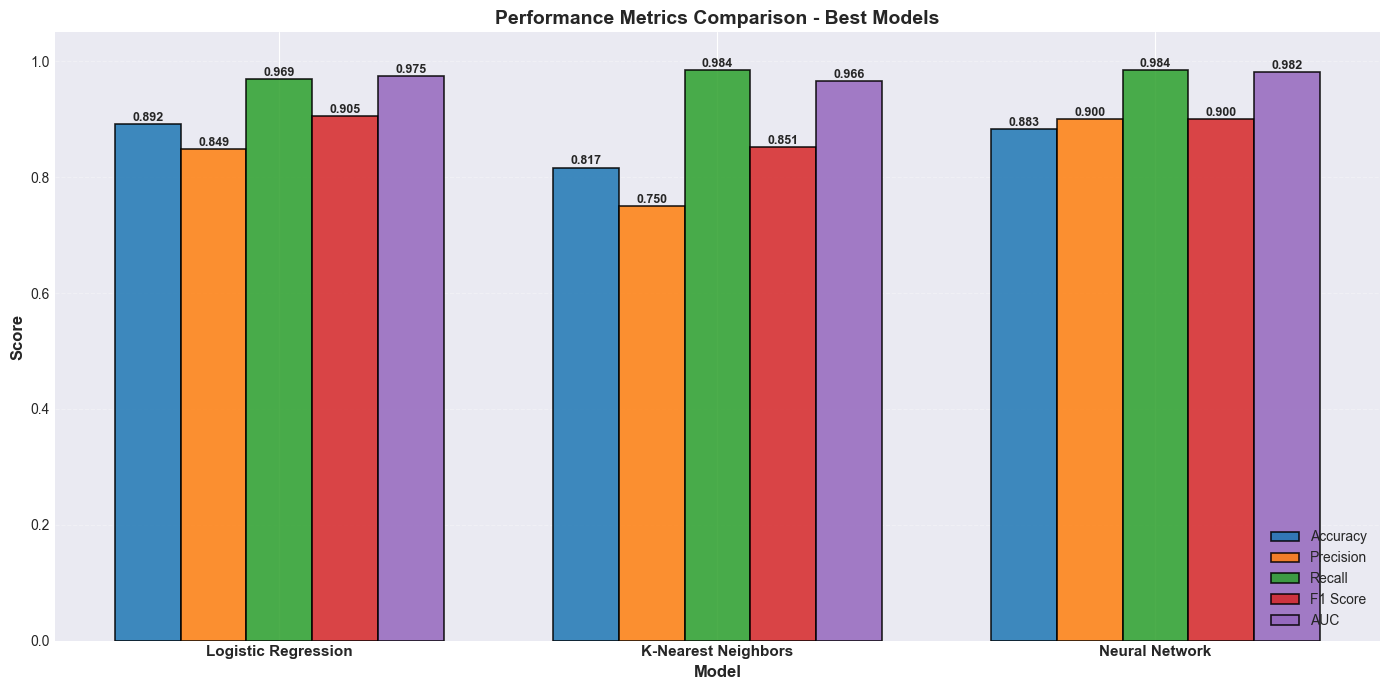

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
x = np.arange(len(comparison_df))
width = 0.15

for i, metric in enumerate(metrics):
    offset = (i - 2) * width
    bars = ax.bar(x + offset, comparison_df[metric], width, label=metric, 
                   edgecolor='black', linewidth=1.2, alpha=0.85)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontweight='bold', fontsize=9)

ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Performance Metrics Comparison - Best Models', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'], fontsize=11, fontweight='bold')
ax.set_ylim([0, 1.05])
ax.legend(loc='lower right', fontsize=10, framealpha=0.95)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

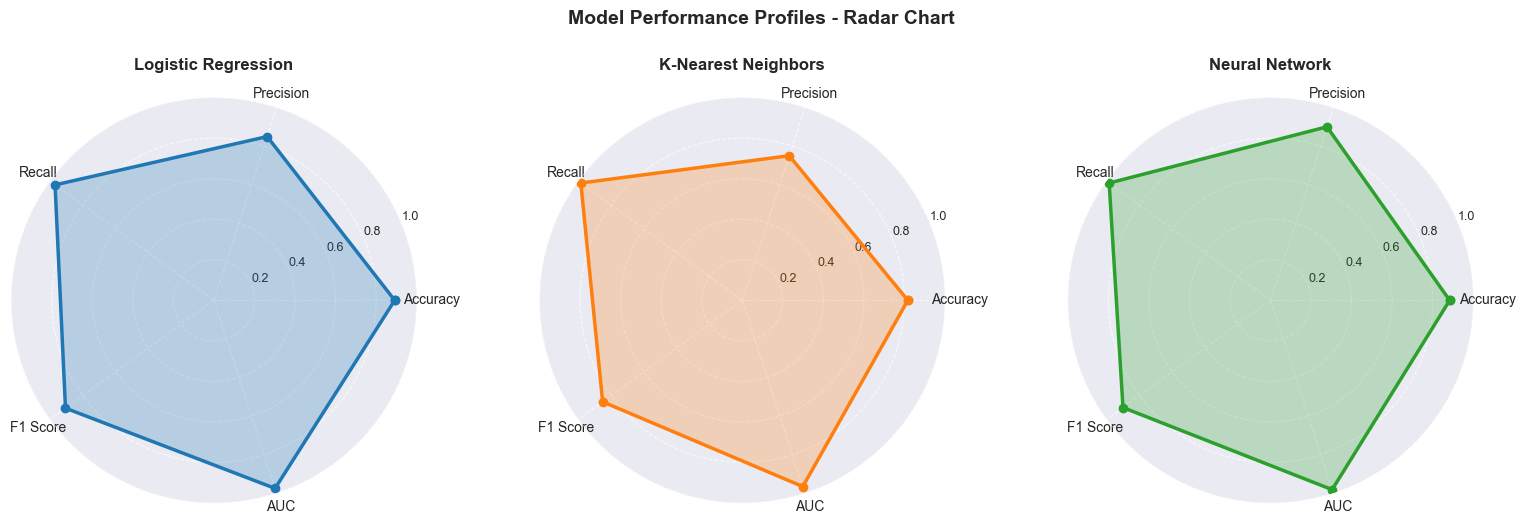

In [ ]:
from math import pi

fig, axes = plt.subplots(1, 3, figsize=(16, 5), subplot_kw=dict(projection='polar'))
fig.suptitle('Model Performance Profiles - Radar Chart', fontsize=14, fontweight='bold', y=1.02)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
angles = [n / len(metrics) * 2 * pi for n in range(len(metrics))]
angles += angles[:1]

for idx, (model_name, ax) in enumerate(zip(comparison_df['Model'], axes)):
    values = comparison_df.iloc[idx][metrics].values.tolist()
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2.5, color=COLORS[idx], label=model_name)
    ax.fill(angles, values, alpha=0.25, color=COLORS[idx])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=10)
    ax.set_ylim([0, 1])
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=9)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_title(model_name, fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

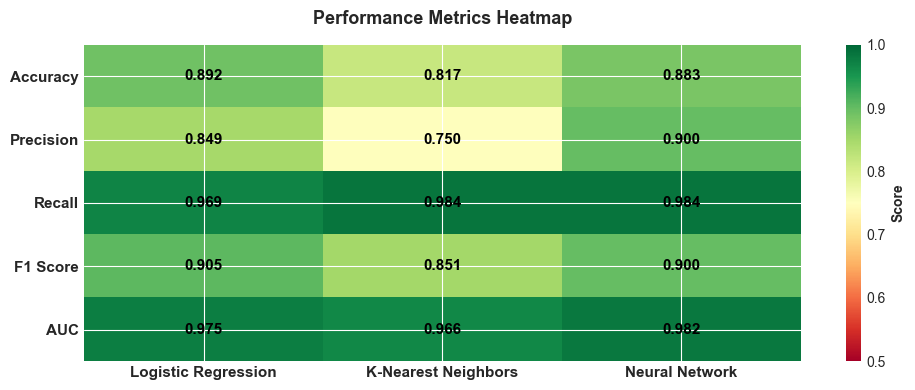

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

heatmap_data = comparison_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']].T

im = ax.imshow(heatmap_data, cmap='RdYlGn', aspect='auto', vmin=0.5, vmax=1.0)

ax.set_xticks(np.arange(len(comparison_df)))
ax.set_yticks(np.arange(len(heatmap_data)))
ax.set_xticklabels(comparison_df['Model'], fontsize=11, fontweight='bold')
ax.set_yticklabels(heatmap_data.index, fontsize=11, fontweight='bold')

for i in range(len(heatmap_data)):
    for j in range(len(comparison_df)):
        value = heatmap_data.iloc[i, j]
        text = ax.text(j, i, f'{value:.3f}',
                      ha="center", va="center", color="black", fontweight='bold', fontsize=11)

ax.set_title('Performance Metrics Heatmap', fontsize=13, fontweight='bold', pad=15)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Score', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

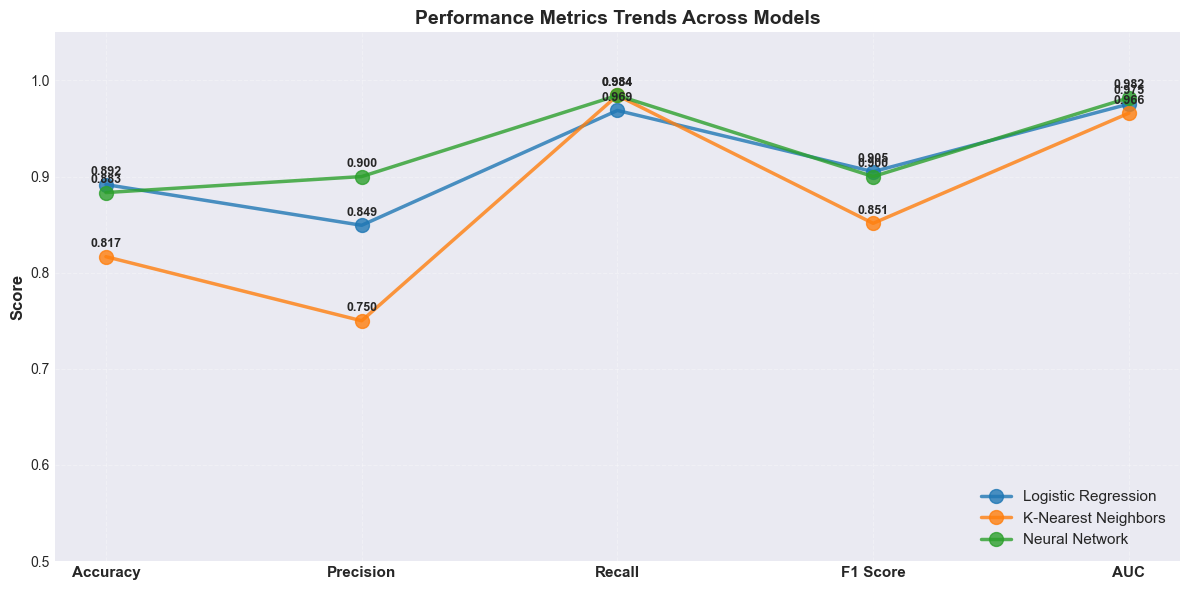

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
x_pos = np.arange(len(metrics))

for idx, model_name in enumerate(comparison_df['Model']):
    values = comparison_df.iloc[idx][metrics].values
    ax.plot(x_pos, values, marker='o', linewidth=2.5, markersize=10, 
            label=model_name, color=COLORS[idx], alpha=0.8)

ax.set_xticks(x_pos)
ax.set_xticklabels(metrics, fontsize=11, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Performance Metrics Trends Across Models', fontsize=14, fontweight='bold')
ax.set_ylim([0.5, 1.05])
ax.legend(loc='lower right', fontsize=11, framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--')

for idx, model_name in enumerate(comparison_df['Model']):
    values = comparison_df.iloc[idx][metrics].values
    for x, y in zip(x_pos, values):
        ax.text(x, y + 0.01, f'{y:.3f}', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

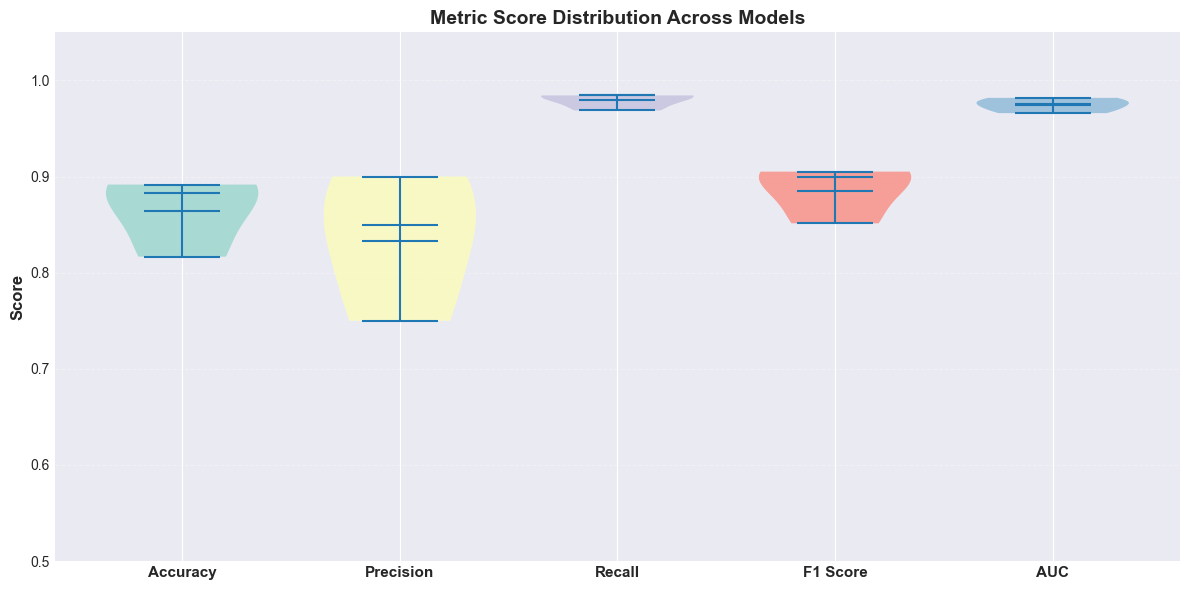

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

all_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
data_to_plot = [comparison_df[metric].values for metric in all_metrics]

positions = np.arange(len(all_metrics))
parts = ax.violinplot(data_to_plot, positions=positions, widths=0.7, showmeans=True, showmedians=True)

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(plt.cm.Set3(i))
    pc.set_alpha(0.7)

ax.set_xticks(positions)
ax.set_xticklabels(all_metrics, fontsize=11, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Metric Score Distribution Across Models', fontsize=14, fontweight='bold')
ax.set_ylim([0.5, 1.05])
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

## Section 4: Generate Summary Statistics Table

In [ ]:
summary_table = pd.DataFrame({
    'Model': comparison_df['Model'],
    'Feature Transformation': comparison_df['Feature Transform'],
    'Accuracy': comparison_df['Accuracy'].round(4),
    'Precision': comparison_df['Precision'].round(4),
    'Recall': comparison_df['Recall'].round(4),
    'F1 Score': comparison_df['F1 Score'].round(4),
    'AUC': comparison_df['AUC'].round(4)
})

print("\n" + "=" * 120)
print("COMPREHENSIVE MODEL COMPARISON - Test Set Results")
print("=" * 120)
print(summary_table.to_string(index=False))
print("=" * 120)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
print("\nBEST PERFORMERS BY METRIC:")
print("-" * 80)
for metric in metrics:
    best_idx = summary_table[metric].idxmax()
    best_model = summary_table.loc[best_idx, 'Model']
    best_score = summary_table.loc[best_idx, metric]
    print(f"{metric:15} : {best_model:25} ({best_score:.4f})")

print("\n" + "=" * 80)
print("OVERALL MODEL RANKING (Average across all metrics)")
print("=" * 80)
ranking = pd.DataFrame({
    'Model': comparison_df['Model'],
    'Avg Score': comparison_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']].mean(axis=1)
}).sort_values('Avg Score', ascending=False).reset_index(drop=True)
ranking['Rank'] = range(1, len(ranking) + 1)
ranking['Avg Score'] = ranking['Avg Score'].round(4)

print(ranking[['Rank', 'Model', 'Avg Score']].to_string(index=False))


COMPREHENSIVE MODEL COMPARISON - Test Set Results
              Model   Feature Transformation  Accuracy  Precision  Recall  F1 Score    AUC
Logistic Regression Baseline (untransformed)    0.8917     0.8493  0.9688    0.9051 0.9754
K-Nearest Neighbors      Polynomial degree 3    0.8167     0.7500  0.9844    0.8514 0.9660
     Neural Network Baseline (untransformed)    0.8833     0.9000  0.9844    0.9000 0.9819

BEST PERFORMERS BY METRIC:
--------------------------------------------------------------------------------
Accuracy        : Logistic Regression       (0.8917)
Precision       : Neural Network            (0.9000)
Recall          : K-Nearest Neighbors       (0.9844)
F1 Score        : Logistic Regression       (0.9051)
AUC             : Neural Network            (0.9819)

OVERALL MODEL RANKING (Average across all metrics)
 Rank               Model  Avg Score
    1      Neural Network     0.9299
    2 Logistic Regression     0.9181
    3 K-Nearest Neighbors     0.8737


## Section 5: Performance Metrics vs Feature Transformations

In [ ]:
lr_all_results = pd.read_csv('results/logistic_regression/model_results.csv')
knn_all_results = pd.read_csv('results/knn/model_results.csv')
nn_all_results = pd.read_csv('results/neural_network/model_results.csv')

print("Logistic Regression Results Shape:", lr_all_results.shape)
print("KNN Results Shape:", knn_all_results.shape)
print("Neural Network Results Shape:", nn_all_results.shape)

lr_by_feature = lr_all_results.groupby('version_desc')[['test_acc', 'test_precision', 'test_recall', 'test_f1', 'test_auc']].agg(['mean', 'std', 'min', 'max'])

print("\n" + "=" * 100)
print("LOGISTIC REGRESSION: Performance by Feature Transformation")
print("=" * 100)
print(lr_by_feature.round(4))

Logistic Regression Results Shape: (24, 10)
KNN Results Shape: (128, 11)
Neural Network Results Shape: (96, 10)

LOGISTIC REGRESSION: Performance by Feature Transformation
                         test_acc                         test_precision  \
                             mean     std     min     max           mean   
version_desc                                                               
Baseline (untransformed)   0.7958  0.1413  0.5500  0.9000         0.7532   
PCA (95% variance)         0.7847  0.1320  0.5500  0.8833         0.7380   
Polynomial degree 2        0.6736  0.0770  0.5333  0.7250         0.6242   
Polynomial degree 3        0.8889  0.0114  0.8750  0.9083         0.8702   

                                                 test_recall                  \
                             std     min     max        mean     std     min   
version_desc                                                                   
Baseline (untransformed)  0.1330  0.5424  0.8611      0

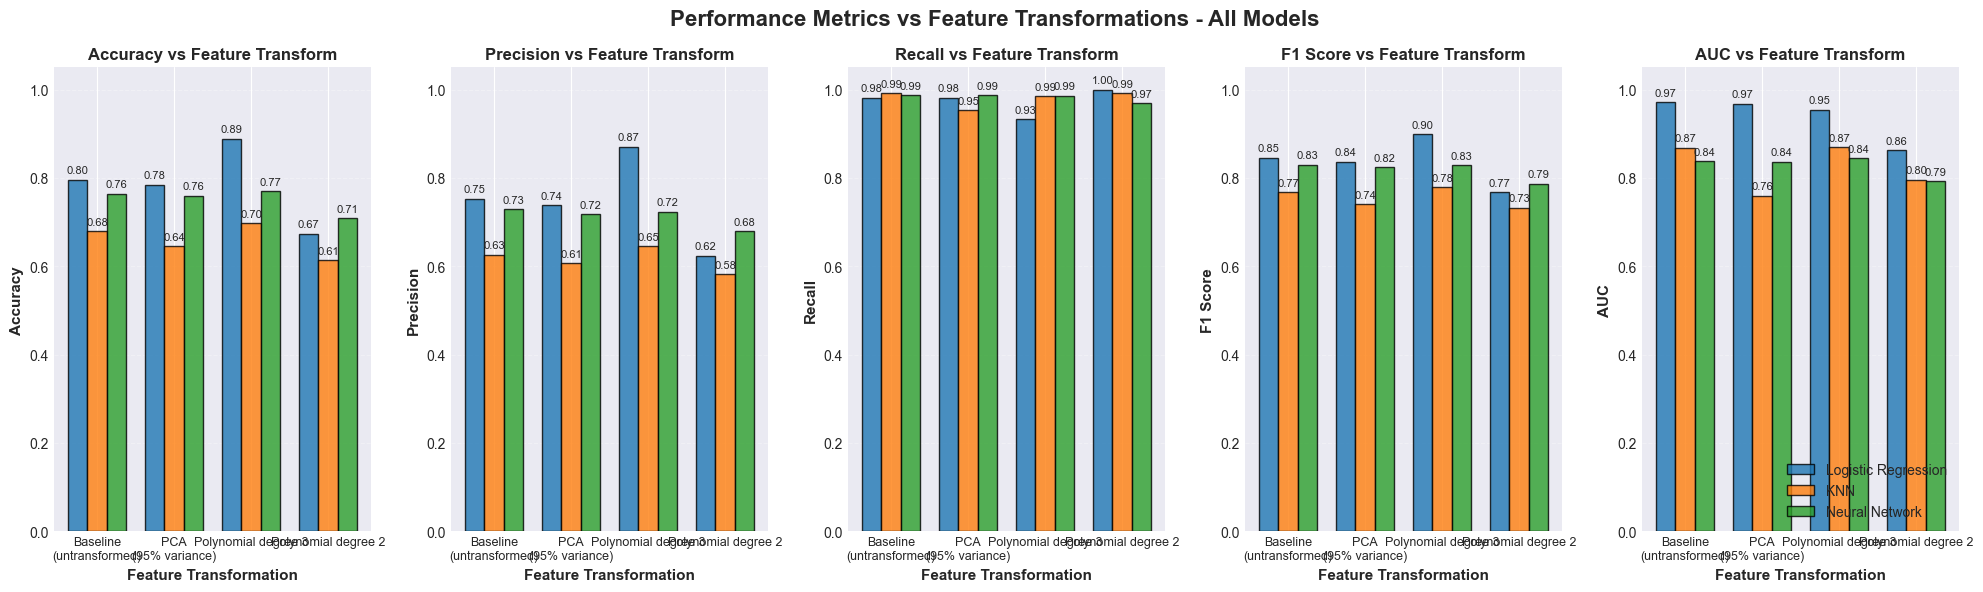

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
fig.suptitle('Performance Metrics vs Feature Transformations - All Models', fontsize=16, fontweight='bold')

metrics_to_plot = ['test_acc', 'test_precision', 'test_recall', 'test_f1', 'test_auc']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

feature_transformations = lr_all_results['version_desc'].unique()
x = np.arange(len(feature_transformations))
width = 0.25

for idx, (metric, name) in enumerate(zip(metrics_to_plot, metric_names)):
    ax = axes[idx]
    
    lr_means = lr_all_results.groupby('version_desc')[metric].mean()[feature_transformations].values
    knn_means = knn_all_results.groupby('version_desc')[metric].mean()[feature_transformations].values
    nn_means = nn_all_results.groupby('version_desc')[metric].mean()[feature_transformations].values
    
    bars1 = ax.bar(x - width, lr_means, width, label='Logistic Regression', 
                   color='#1f77b4', alpha=0.8, edgecolor='black', linewidth=1)
    bars2 = ax.bar(x, knn_means, width, label='KNN', 
                   color='#ff7f0e', alpha=0.8, edgecolor='black', linewidth=1)
    bars3 = ax.bar(x + width, nn_means, width, label='Neural Network', 
                   color='#2ca02c', alpha=0.8, edgecolor='black', linewidth=1)
    
    ax.set_xlabel('Feature Transformation', fontweight='bold', fontsize=11)
    ax.set_ylabel(name, fontweight='bold', fontsize=11)
    ax.set_title(f'{name} vs Feature Transform', fontweight='bold', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels([s.replace(' (', '\n(') for s in feature_transformations], fontsize=9, ha='center')
    ax.set_ylim([0, 1.05])
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    if idx == 4:
        ax.legend(loc='lower right', fontsize=10, framealpha=0.95)
    
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Logistic Regression: Performance Metrics vs Feature Transformations', fontsize=16, fontweight='bold')

axes_flat = axes.flatten()

for idx, (metric, name) in enumerate(zip(metrics_to_plot, metric_names)):
    ax = axes_flat[idx]
    
    feature_means = lr_all_results.groupby('version_desc')[metric].mean().sort_values(ascending=False)
    feature_stds = lr_all_results.groupby('version_desc')[metric].std()
    
    bars = ax.bar(range(len(feature_means)), feature_means.values, 
                  yerr=feature_stds.values, capsize=5, alpha=0.7,
                  color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][:len(feature_means)],
                  edgecolor='black', linewidth=1.5)
    
    ax.set_xticks(range(len(feature_means)))
    ax.set_xticklabels([s.replace(' (', '\n(') for s in feature_means.index], fontsize=9, ha='center')
    ax.set_ylabel(name, fontweight='bold')
    ax.set_ylim([0, 1.0])
    ax.grid(axis='y', alpha=0.3)
    ax.set_title(f'{name} by Feature Transform', fontweight='bold')
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

axes_flat[-1].remove()

plt.tight_layout()
plt.show()

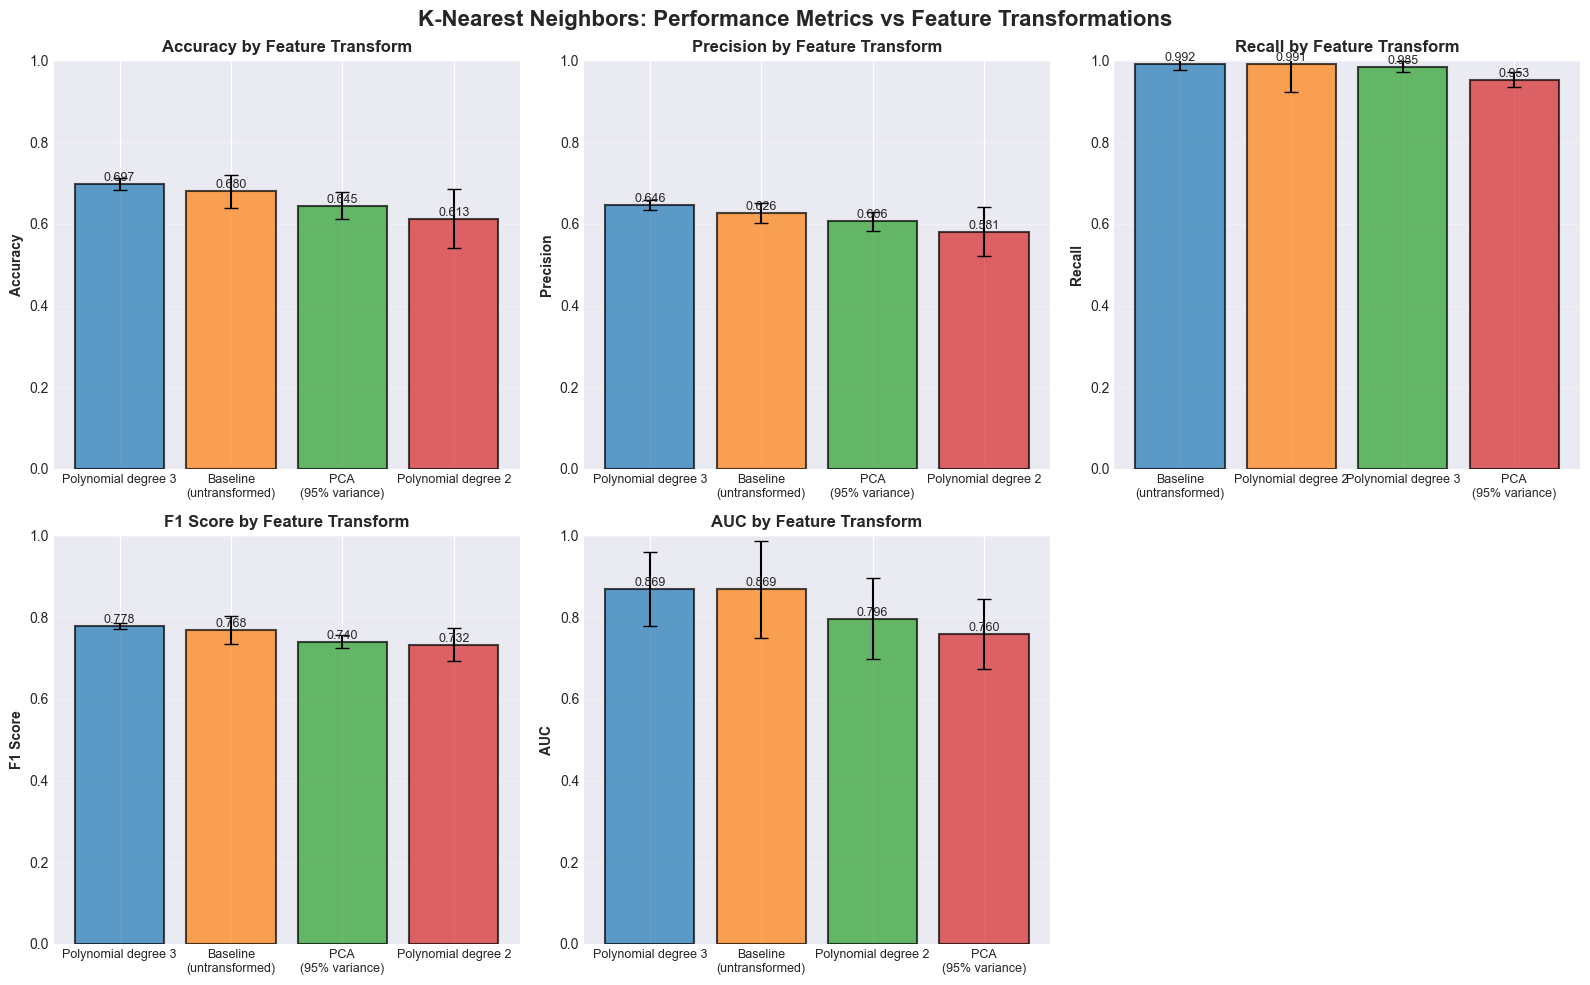

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('K-Nearest Neighbors: Performance Metrics vs Feature Transformations', fontsize=16, fontweight='bold')

axes_flat = axes.flatten()

for idx, (metric, name) in enumerate(zip(metrics_to_plot, metric_names)):
    ax = axes_flat[idx]
    
    feature_means = knn_all_results.groupby('version_desc')[metric].mean().sort_values(ascending=False)
    feature_stds = knn_all_results.groupby('version_desc')[metric].std()
    
    bars = ax.bar(range(len(feature_means)), feature_means.values, 
                  yerr=feature_stds.values, capsize=5, alpha=0.7,
                  color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][:len(feature_means)],
                  edgecolor='black', linewidth=1.5)
    
    ax.set_xticks(range(len(feature_means)))
    ax.set_xticklabels([s.replace(' (', '\n(') for s in feature_means.index], fontsize=9, ha='center')
    ax.set_ylabel(name, fontweight='bold')
    ax.set_ylim([0, 1.0])
    ax.grid(axis='y', alpha=0.3)
    ax.set_title(f'{name} by Feature Transform', fontweight='bold')
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

axes_flat[-1].remove()

plt.tight_layout()
plt.show()

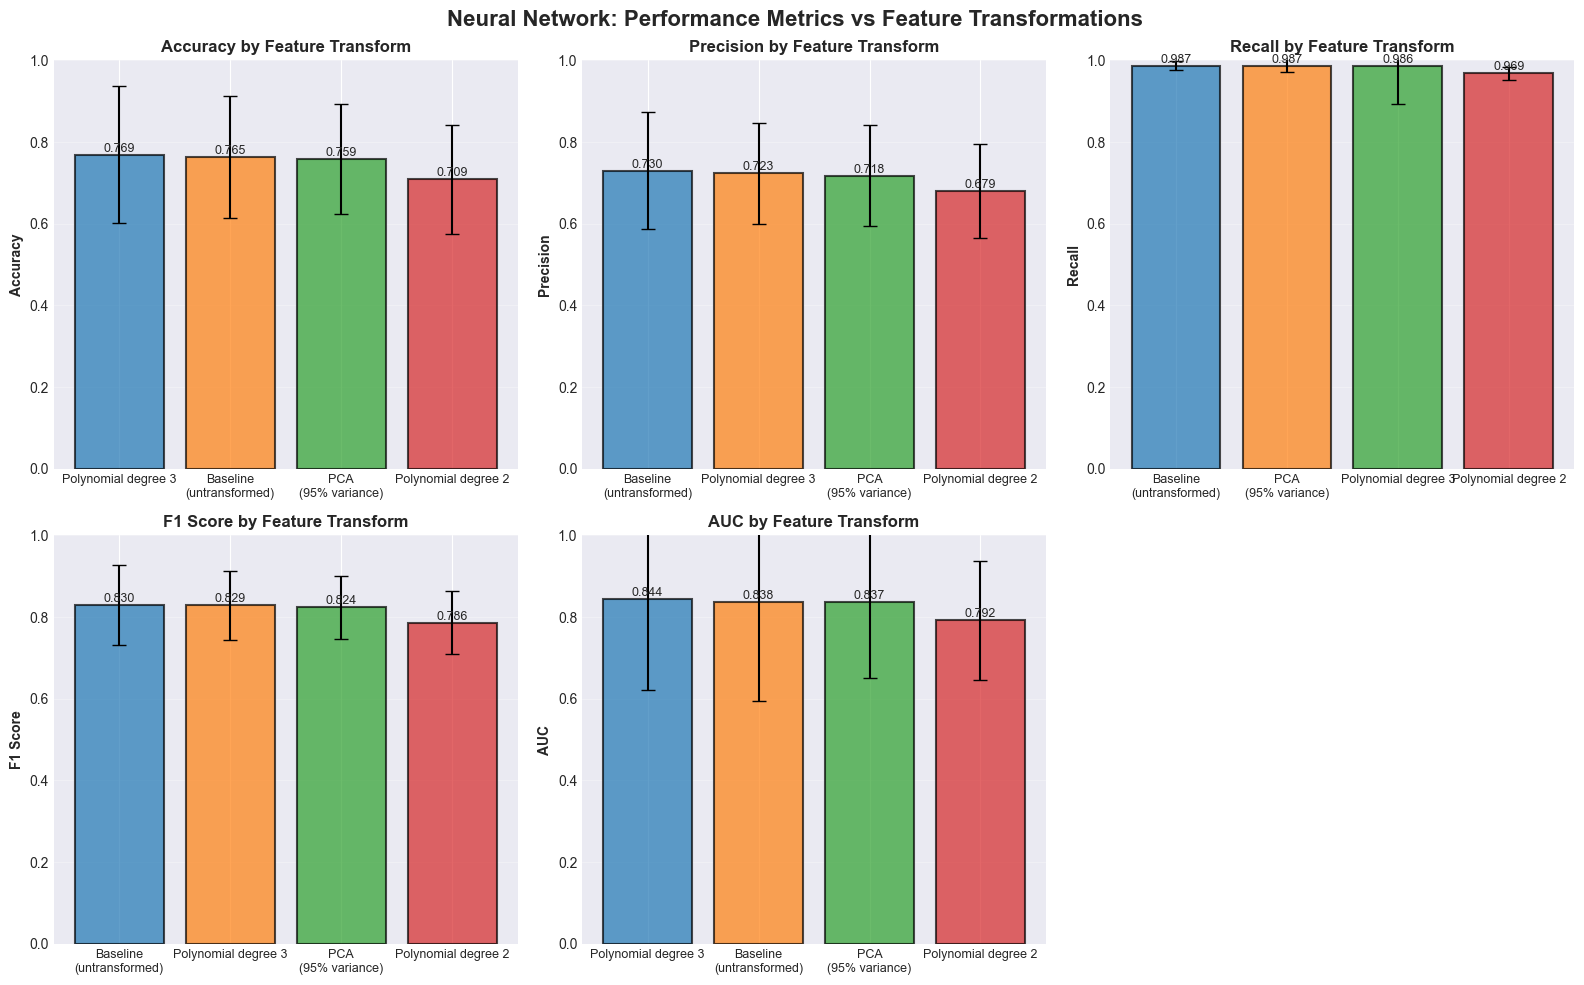

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Neural Network: Performance Metrics vs Feature Transformations', fontsize=16, fontweight='bold')

axes_flat = axes.flatten()

for idx, (metric, name) in enumerate(zip(metrics_to_plot, metric_names)):
    ax = axes_flat[idx]
    
    feature_means = nn_all_results.groupby('version_desc')[metric].mean().sort_values(ascending=False)
    feature_stds = nn_all_results.groupby('version_desc')[metric].std()
    
    bars = ax.bar(range(len(feature_means)), feature_means.values, 
                  yerr=feature_stds.values, capsize=5, alpha=0.7,
                  color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][:len(feature_means)],
                  edgecolor='black', linewidth=1.5)
    
    ax.set_xticks(range(len(feature_means)))
    ax.set_xticklabels([s.replace(' (', '\n(') for s in feature_means.index], fontsize=9, ha='center')
    ax.set_ylabel(name, fontweight='bold')
    ax.set_ylim([0, 1.0])
    ax.grid(axis='y', alpha=0.3)
    ax.set_title(f'{name} by Feature Transform', fontweight='bold')
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

axes_flat[-1].remove()

plt.tight_layout()
plt.show()

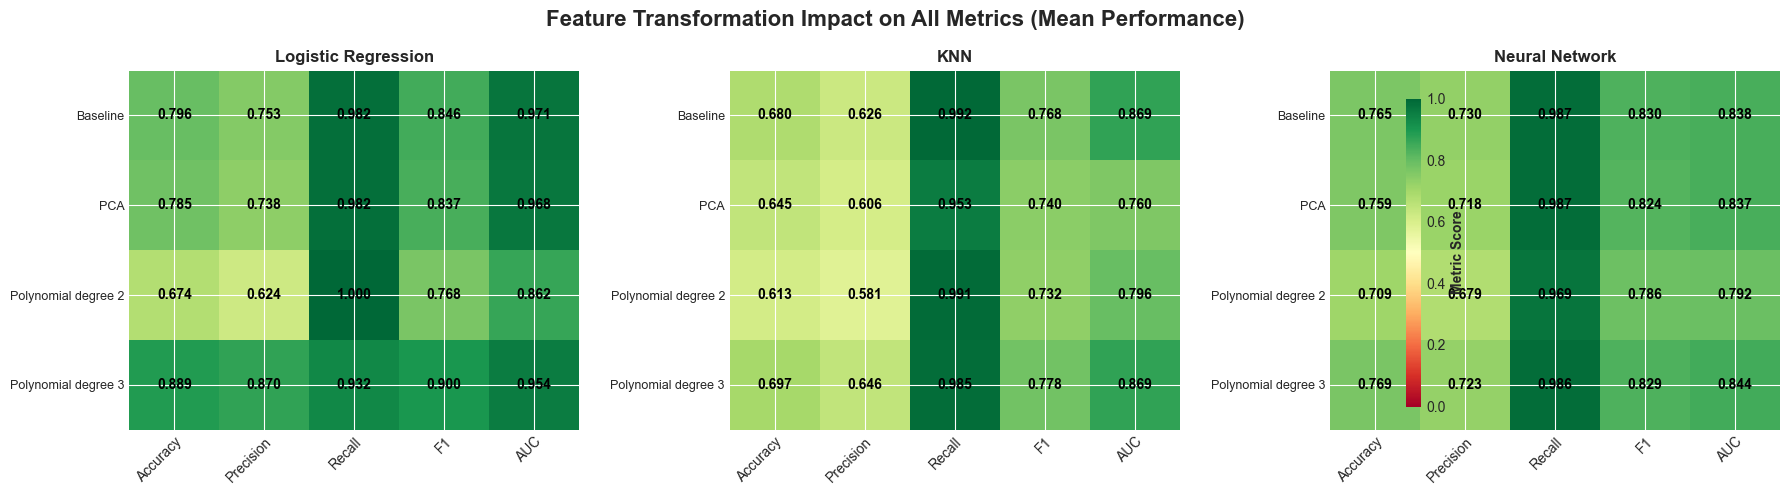

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Feature Transformation Impact on All Metrics (Mean Performance)', fontsize=16, fontweight='bold')

models_data = [
    ('Logistic Regression', lr_all_results, axes[0]),
    ('KNN', knn_all_results, axes[1]),
    ('Neural Network', nn_all_results, axes[2])
]

for model_name, data, ax in models_data:
    metric_cols = ['test_acc', 'test_precision', 'test_recall', 'test_f1', 'test_auc']
    metric_names_short = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
    
    pivot_data = data.groupby('version_desc')[metric_cols].mean()
    pivot_data.columns = metric_names_short
    
    im = ax.imshow(pivot_data.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    
    ax.set_xticks(np.arange(len(metric_names_short)))
    ax.set_yticks(np.arange(len(pivot_data)))
    ax.set_xticklabels(metric_names_short, fontsize=10)
    ax.set_yticklabels([s.split('(')[0].strip() for s in pivot_data.index], fontsize=9)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    for i in range(len(pivot_data)):
        for j in range(len(metric_names_short)):
            text = ax.text(j, i, f'{pivot_data.values[i, j]:.3f}',
                          ha="center", va="center", color="black", fontsize=10, fontweight='bold')
    
    ax.set_title(model_name, fontweight='bold', fontsize=12)

cbar = plt.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8)
cbar.set_label('Metric Score', fontweight='bold')

plt.tight_layout()
plt.show()